Group Name: Altronixx
1. Harsh Verma
2. Akhilesh Bonde
3. Ayushkumar pandey
4. Riddvesh Dixit

In [129]:
#import libray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [130]:
df = pd.read_csv("/content/loan.csv") #read the dataset

In [131]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [133]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [134]:
df.shape

(614, 13)

<Axes: >

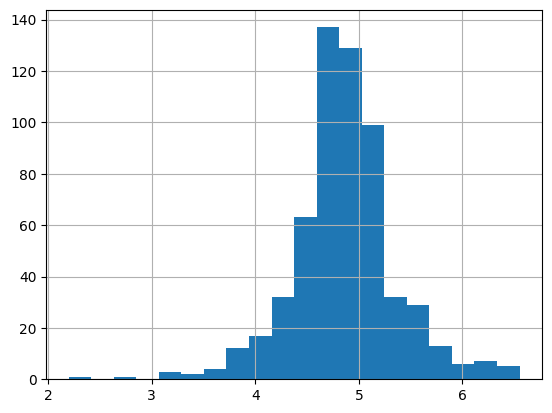

In [135]:
df['loanAmount_log']= np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)#freuency on data according to people

<Axes: >

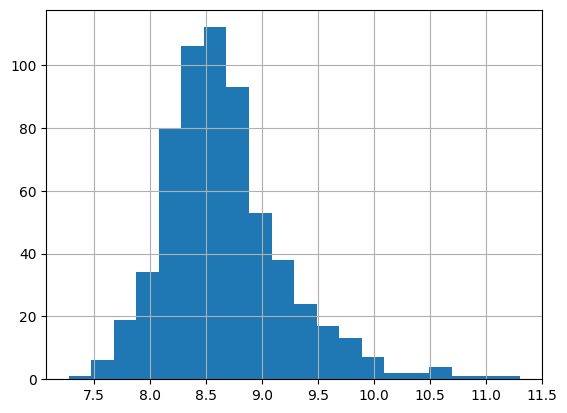

In [136]:
df['TotalIncome'] = df['ApplicantIncome'] +df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)#frequency after total income

In [137]:
#Train-Test-Split

In [138]:
x = df.iloc[:,np.r_[1:5, 9:11,13:15]].values
y = df.iloc[:,12].values

In [139]:
x

array([['Male', 'No', '0', ..., 1.0, nan, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [140]:
y# y is the final prediction here

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

number of people who take loan as group by gender: 
Gender
Male      489
Female    112
Name: count, dtype: int64


/tmp/ipython-input-141-2474796596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender" , data = df , palette = 'Set1') #data distribution


<Axes: xlabel='Gender', ylabel='count'>

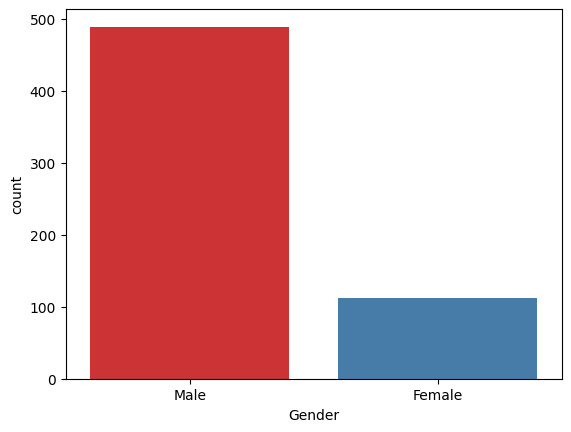

In [141]:
print("number of people who take loan as group by gender: ")
print(df['Gender'].value_counts())
sns.countplot(x="Gender" , data = df , palette = 'Set1') #data distribution

number of people who take loan as Married human: 
Married
Yes    398
No     213
Name: count, dtype: int64


/tmp/ipython-input-142-1423649042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married" , data = df , palette = 'Set1') #data distribution


<Axes: xlabel='Married', ylabel='count'>

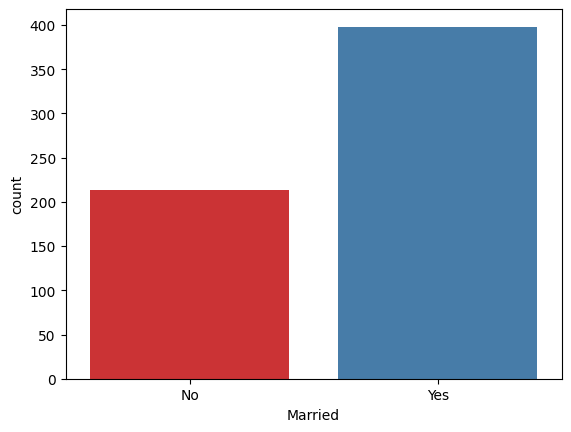

In [142]:

print("number of people who take loan as Married human: ")
print(df['Married'].value_counts())
sns.countplot(x="Married" , data = df , palette = 'Set1') #data distribution

In [143]:
print("number of people who take loan and are self employed as well: ")
print(df['Self_Employed'].value_counts())#data distribution


number of people who take loan and are self employed as well: 
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [144]:
print("number of people who take loan from different areas are: ")
print(df['Property_Area'].value_counts())
#data distribution

number of people who take loan from different areas are: 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


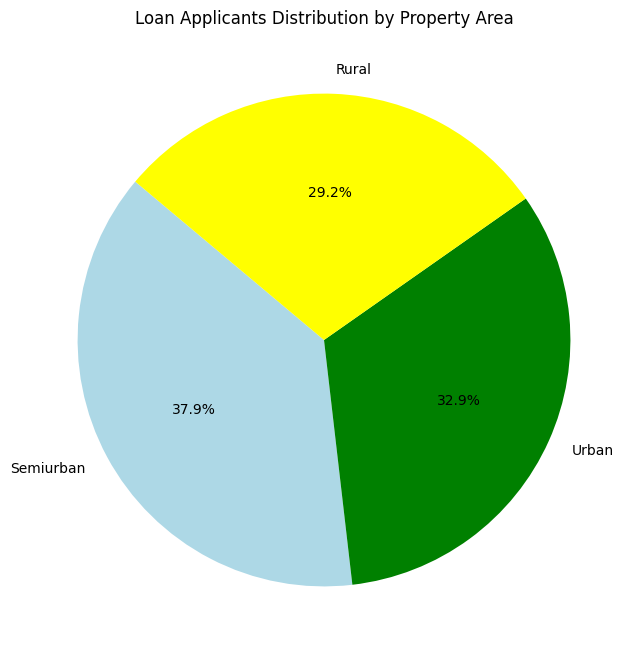

In [145]:
property_area_counts = df['Property_Area'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    property_area_counts,
    labels=property_area_counts.index,
    autopct='%1.1f%%',
    colors=['lightblue', 'green', 'yellow'],
    startangle=140
)
plt.title('Loan Applicants Distribution by Property Area')
plt.show()

number of people who take loan as group by LoanAmount: 
LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

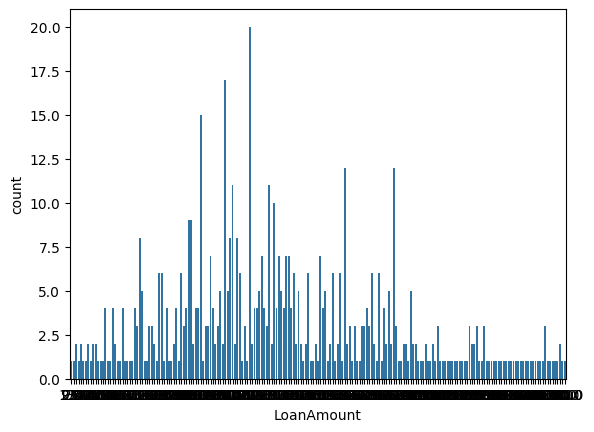

In [146]:
print("number of people who take loan as group by LoanAmount: ")
print(df['LoanAmount'].value_counts())
sns.countplot(x="LoanAmount" , data = df )#frequncy according to loan ammount

number of people who take loan as group by Credit History : 
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


/tmp/ipython-input-147-4182571496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History" , data = df , palette = 'Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

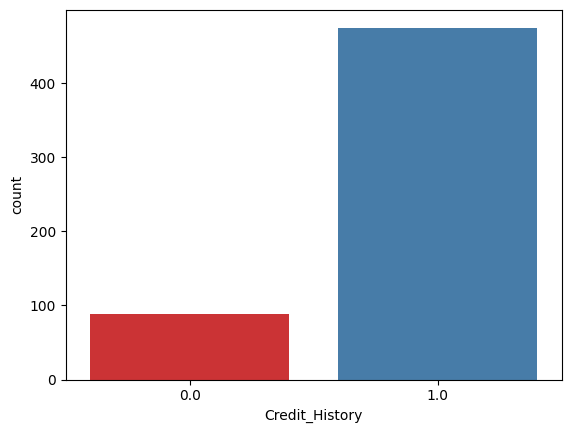

In [147]:
print("number of people who take loan as group by Credit History : ")
print(df['Credit_History'].value_counts())
sns.countplot(x="Credit_History" , data = df , palette = 'Set1')

In [148]:
# People with a good credit history (1) are about 6 times more than that are having a poor credit history (0)
# 525/614 are having a good credit history = 85.5%
# 89/614 are having poor credit history = 14.5 %

In [149]:
import sklearn
from sklearn.model_selection import train_test_split

In [150]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state = 0 )#splitting the data

In [151]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [152]:
for i in range(0,5):
    X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])
    X_train[:,7] = Labelencoder_x.fit_transform(X_train[:,7])

In [153]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)


In [154]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [155]:
X_test

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.430816798843313,
        7085.0],
       ['Female', 'No', '0', 'Graduate', 360.0, 1.0, 4.718498871295094,
        4230.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 5.780743515792329,
        10039.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.700480365792417,
        6784.0],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0, 4.574710978503383,
        3875.0],
       ['Male', 'Yes', '0', 'Not Graduate', 180.0, 0.0, 5.10594547390058,
        6058.0],
       ['Male', 'Yes', '3+', 'Graduate', 180.0, 1.0, 5.056245805348308,
        6417.0],
       ['Male', 'No', '0', 'Graduate', 360.0, 1.0, 6.003887067106539,
        12876.0],
       ['Male', 'No', '0', 'Graduate', nan, 0.0, 4.820281565605037,
        5124.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.852030263919617,
        5233.0],
       ['Female', 'No', '0', 'Graduate', 360.0, 1.0, 4.430816798843313,
        2917.0],
       ['Male', 'Yes', '1', '

In [156]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [157]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5 , criterion ='gini', )
dt.fit(X_train,y_train)#training according to decision tree

DecisionTreeClassifier(max_depth=5)

In [158]:
#accuracy according to decision tree
for i in range(0,5):
    X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])

y_pred = dt.predict(X_test)
print("accuracy for DT is %.",sklearn.metrics.accuracy_score(y_pred,y_test)*100)

accuracy for DT is %. 69.91869918699187


In [159]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_samples=36,oob_score= True)
RFC.fit(X_train,y_train)



RandomForestClassifier(max_samples=36, oob_score=True)

In [160]:
from sklearn.metrics import accuracy_score
y_pred = RFC.predict(X_test)

In [161]:
print("accuracy for RandomForestClassifier is %.",sklearn.metrics.accuracy_score(y_pred,y_test))
#accuracy by randomforest

accuracy for RandomForestClassifier is %. 0.8292682926829268
